In [ ]:
#We will the Sequential model from keras to train a neural network to predict species name from sepal/petal width and length.
#the data can be found at the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php
#This is a small scale data and should be used as introductory practice session.
#This dataset would give us a very high accuracy score from out of the box.
#Hence, we won't be tinkering any hyperparameters for this model.
#This classificatin problem can be solved using any standard classifcation algorithms. But the goal here is to solve using Deeplearning methods.


# Data upload, Inspection, and Preprocessing

In [1]:
#we will upload the module as we go along, better for a tutorial and guide book.
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Irisdataset.csv')
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
#Let's check if we have any nun values in our data, two ways to check
print(df.info())
df.isnull().sum()   #isnull function will provide a boolean, false=0, if the sum is zero, that means we don't have any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df['Species'].unique()  
print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [ ]:
#we have three different type of species, lets label them using the Labelencoder from sklearn

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0


In [6]:
#After the inspection of the data, we can delete the Id column, create and X and y variables for our sets
#y variables('Species' column) is an object data-type, we need to change to numeric so that our model can read it.

df = df.drop(columns='Id')
X = df.drop(columns='Species')
y = df['Species']
print(y.head(3))
print(X.head(3))
      

0    0
1    0
2    0
Name: Species, dtype: int64
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2


In [7]:
#let's split our data into training and testing sets using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=69, shuffle=True, test_size=0.3)

In [8]:
print(x_train[:2]) #let's see our first two rows

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57             4.9           2.4            3.3           1.0
142            5.8           2.7            5.1           1.9


In [9]:
#now we will scale our X by using MinMaxScaler from sklearn, so that alogorithm won't be biased towards any big number
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train[:2] #let's see our first two rows of data again

array([[0.14285714, 0.2       , 0.40350877, 0.375     ],
       [0.4       , 0.35      , 0.71929825, 0.75      ]])

# Building and training the model

In [10]:
# we are ready to build our model, let's import all the required keras packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [11]:
#one last thing: we have to convert our y-data into a matrix.
print('before conversion')
print(y_train[:3])

y_train = keras.utils.to_categorical(y_train, num_classes=3)
print('after conversion')
print(y_train[:3])


before conversion
57     1
142    2
72     1
Name: Species, dtype: int64
after conversion
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [12]:
# now we are ready to build our model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_shape=(x_train.shape[1],)))
#that was our first hidden layer with 50 neurons. Actually the 2nd layer after the input layer. 
#We had to provide an input shape =(4,) because of the 4 variables of our dataset.

model.add(Dense(units=100, activation='relu')) #our second hidden layer, input shape will be determined automatically
model.add(Dropout(0.5))                        # we are droping 50% of the neurons to prevent overfitting
model.add(Dense(units=3, activation='softmax')) #this is our output layer with 3 units, representing 3 possible outputs


Metal device set to: Apple M1


2022-01-09 05:01:49.252790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-09 05:01:49.253002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
#now we will compile the model take a look at the overall summary
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Let't our training data to this model
model.fit(x_train, y_train, epochs=100, validation_split=0.3, shuffle=True, verbose =2)
#we are not adding batch size because the dataset is very small
#we are also creating a validation split to judde our model if it is overfitting

Epoch 1/100
3/3 - 0s - loss: 0.8929 - accuracy: 0.6164 - val_loss: 0.9303 - val_accuracy: 0.6562 - 51ms/epoch - 17ms/step
Epoch 2/100
3/3 - 0s - loss: 0.8751 - accuracy: 0.6575 - val_loss: 0.9100 - val_accuracy: 0.6562 - 37ms/epoch - 12ms/step
Epoch 3/100
3/3 - 0s - loss: 0.8742 - accuracy: 0.6164 - val_loss: 0.8856 - val_accuracy: 0.6562 - 39ms/epoch - 13ms/step
Epoch 4/100
3/3 - 0s - loss: 0.8567 - accuracy: 0.6438 - val_loss: 0.8605 - val_accuracy: 0.6562 - 34ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 0.8321 - accuracy: 0.6438 - val_loss: 0.8363 - val_accuracy: 0.6562 - 33ms/epoch - 11ms/step
Epoch 6/100
3/3 - 0s - loss: 0.7820 - accuracy: 0.6575 - val_loss: 0.8109 - val_accuracy: 0.6562 - 35ms/epoch - 12ms/step
Epoch 7/100
3/3 - 0s - loss: 0.7776 - accuracy: 0.6986 - val_loss: 0.7840 - val_accuracy: 0.6562 - 36ms/epoch - 12ms/step
Epoch 8/100
3/3 - 0s - loss: 0.7817 - accuracy: 0.6301 - val_loss: 0.7543 - val_accuracy: 0.6562 - 42ms/epoch - 14ms/step
Epoch 9/100
3/3 - 0s - l

Epoch 68/100
3/3 - 0s - loss: 0.3085 - accuracy: 0.9178 - val_loss: 0.2159 - val_accuracy: 1.0000 - 35ms/epoch - 12ms/step
Epoch 69/100
3/3 - 0s - loss: 0.2932 - accuracy: 0.8904 - val_loss: 0.2043 - val_accuracy: 0.9688 - 32ms/epoch - 11ms/step
Epoch 70/100
3/3 - 0s - loss: 0.2682 - accuracy: 0.9041 - val_loss: 0.1988 - val_accuracy: 0.9375 - 32ms/epoch - 11ms/step
Epoch 71/100
3/3 - 0s - loss: 0.2675 - accuracy: 0.9452 - val_loss: 0.1975 - val_accuracy: 0.9375 - 32ms/epoch - 11ms/step
Epoch 72/100
3/3 - 0s - loss: 0.2807 - accuracy: 0.9315 - val_loss: 0.2026 - val_accuracy: 1.0000 - 32ms/epoch - 11ms/step
Epoch 73/100
3/3 - 0s - loss: 0.2905 - accuracy: 0.8904 - val_loss: 0.2095 - val_accuracy: 0.9688 - 32ms/epoch - 11ms/step
Epoch 74/100
3/3 - 0s - loss: 0.2578 - accuracy: 0.9041 - val_loss: 0.1995 - val_accuracy: 1.0000 - 33ms/epoch - 11ms/step
Epoch 75/100
3/3 - 0s - loss: 0.2384 - accuracy: 0.9452 - val_loss: 0.1865 - val_accuracy: 0.9375 - 32ms/epoch - 11ms/step
Epoch 76/100
3/3

In [16]:
#we could have stopped after 50 epochs, as the model starts to perform really at around 50 epochs for both training and validation set.

# Prediction and Score

In [17]:
prediction = model.predict(x_test)
print('Before conversion')
print(prediction[:3])

prediction = np.argmax(prediction, axis=1)  # this will covert the prediction matrix to our label
print('After conversion')
print(prediction[:3])



Before conversion
[[9.9851471e-01 1.4848839e-03 3.5042430e-07]
 [3.9449800e-03 8.5517704e-01 1.4087793e-01]
 [9.9652505e-01 3.4736299e-03 1.3237415e-06]]
After conversion
[0 1 0]


2022-01-09 05:08:54.610715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [18]:
#lets score our model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
ac = accuracy_score(y_test, prediction)
cr = classification_report(y_test, prediction)
cm = confusion_matrix(y_test, prediction)
print(ac)
print(cr)
print(cm)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 12  0]
 [ 0  0 17]]


In [19]:
#our model did really well even with the testing sample, if we were dealing with a much larger and uneven dataset\
#we would have seen some discrepancy. Let's create a nice figure for our confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Confusion Matrix')

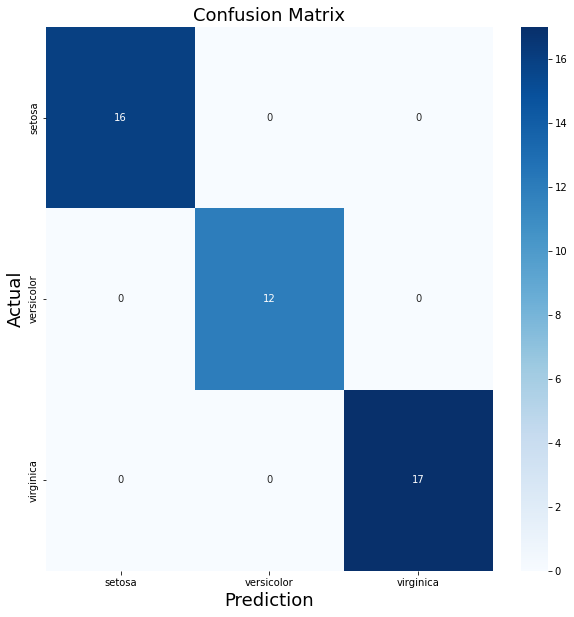

In [22]:
fig = plt.subplots(figsize=(10,10))
fig = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'])
fig.set_xlabel('Prediction', fontsize=18)
fig.set_ylabel('Actual', fontsize=18)
fig.set_title('Confusion Matrix', fontsize=18)

In [23]:
#let's save our model as an h5 file:
model.save('Model_irisdataset.h5')

In [ ]:
#this problem could have been solved by using any standard classification algorithm from scikit learn
#but the goal for this problem was to solve the classification problem using DeepLearning methods.
#we may have gotten a perfect score from this model, but that won't be the case always, especially when we are dealing with large datasets.